In [1]:
#%load_ext lab_black

# Análise de Artigos em HTML da coleção SciELO Brasil com problemas relacionados ao DOI

Para realizar este experimento, utilizei três fontes primárias de dados, os PIDs extraídos da base MST, o site http://doi.org e o serviço http://articlemeta.scielo.org/. Foram construídos dois scripts `python` para extrair os pids do Articlemeta e para acessar o doi.org.

Para criar a análise nós vamos seguir os passos:
1. Encontrar todos os DOI dos  artigos via ArticleMeta
2. Acessar todos os DOI encontrados via ArticleMeta
    1. Para os documentos que não possuem DOI no ArticleMeta produzimos um doi sintético (prefixo + PID)


Os pontos a seguir indicam as situações que podemos nos deparar quando acessamos o DOI registrado no ArticleMeta ou o DOI sintético: 

1. *O artigo possui DOI mas no ArticleMeta não está populado.*
2. O Artigo não possui DOI e no ArticleMeta não está populado (é preciso garantir que ele não possui DOI).
3. O artigo não possui DOI no ArticleMeta e no site MAS possui na API do Crossref.
4. *O artigo possui DOI no ArticleMeta mas não está registrado no crossref.*
5. O Artigo possui DOI no ArticleMeta e está acessível no http://doi.org e no http://www.scielo.br

Todos os pontos acima são importantes, contudo os pontos **1**, **4** serão considerados mais importantes nesta fase de investigação.

**PS: É possível realizar o download dos datasets pelo [link](https://drive.google.com/open?id=1iyVX4Q45Ig8SQkpaQKXSWqun5GmiHO1r)**.

---
Para iniciar a análise foi construído um script para extrair os DOIs do Articlemeta a partir de uma lista de PIDs (scielo pid v2).

Para executar o script digite `python scripts/extract_doi_from_articlemeta.py`.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df_articlemeta = pd.read_csv(
    "resultados/articlemeta.csv",
    sep=";",
    names=["pid", "doi", "found", "collection", "error"],
)

In [4]:
df_articlemeta.head()

,pid,doi,found,collection,error
0,S0104-66322008000100001,10.1590/S0104-66322008000100001,1,scl,NaN
1,S0102-311X2005000100026,10.1590/S0102-311X2005000100026,1,scl,NaN
2,S0102-311X2005000100027,10.1590/S0102-311X2005000100027,1,scl,NaN
3,S0104-66322007000400005,10.1590/S0104-66322007000400005,1,scl,NaN
4,S0104-66322007000400008,10.1590/S0104-66322007000400008,1,scl,NaN


In [5]:
df_articlemeta[df_articlemeta["found"] == 0].shape  # Artigos sem DOI no ArticleMeta

(3676, 5)

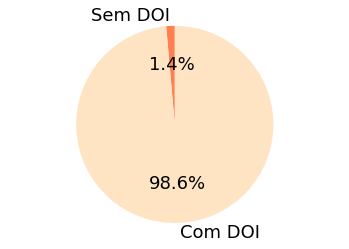

In [6]:
labels = ("Sem DOI", "Com DOI")
data = df_articlemeta.groupby("found", as_index=True)["pid"].count()

fig1, ax1 = plt.subplots()
ax1.pie(
    data,
    labels=labels,
    autopct="%1.1f%%",
    colors=("coral", "bisque"),
    startangle=90,
    textprops={"fontsize": 18},
)
ax1.axis("equal")

plt.show()

A princípio os dados extraídos do Articlemeta indicam que `1.4%` dos artigos não possuem DOI atribuídos. A consequeência desta informação é a não disponibilidade do dado para as ferramentas que utilizam do ArticleMeta como fonte.

## Documentos registrados no ArticleMeta sem DOI definido

O dataset `df_doi` possui duas colunas que indicam a partir de `qual` **DOI** foi possível resolver a página de destino. A coluna `found_by_doi` indica que os DOIs extraídos via ArticleMeta resolveram para uma URL a partir do http://doi.org. A coluna `found_by_generic_doi` indica que foi possível resolver uma URL para o foi formado por `10.1590/PID`, consequentemente foi possível **descobrir** o DOI para o PID em questão.

<!-- A coluna `found_by_generic_doi` indica que o **DOI** extraído do ArticleMeta não está ativo/registrado OU que no ArticleMeta o artigo não possui **DOI**. -->

É possível que o DOI resolva para uma URL que não estava ativa no momento desta verificação.

Para verificar a situação dos DOIs execute o script `python scripts/access_doi_from_doiorg.py`.

In [7]:
df_doi = pd.read_csv(
    "resultados/doi.csv",
    delimiter=";",
    names=["pid", "doi", "found_by_doi", "found_by_generic_doi", "url", "error"],
    dtype={
        "pid": str,
        "doi": str,
        "found_by_doi": int,
        "found_by_generic_doi": int,
        "url": str,
        "error": str,
    },
    na_filter=False,
)
df_doi.head()

,pid,doi,found_by_doi,found_by_generic_doi,url,error
0,S0034-70942011000300002,10.1590/S0034-70942011000300002,1,0,http://www.scielo.br/scielo.php?script=sci_art...,
1,S1809-48722011000300020,10.1590/S1809-48722011000300020,1,0,http://www.scielo.br/scielo.php?script=sci_art...,
2,S0100-879X2007001000010,10.1590/S0100-879X2006005000161,1,0,http://www.scielo.br/scielo.php?script=sci_art...,
3,S0074-02761995000500001,10.1590/S0074-02761995000500001,1,0,http://www.scielo.br/scielo.php?script=sci_art...,
4,S0100-879X2009001000017,10.1590/S0100-879X2009005000017,1,0,http://www.scielo.br/scielo.php?script=sci_art...,


Vejamos quais artigos possuem DOI registrado no Crossref e que não possuem DOI registrado ArticleMeta.

In [8]:
# Artigos que não possuem DOI no ArticleMeta mas que foi possível resolver o DOI a partir do http://doi.org
df_doi[df_doi["found_by_generic_doi"] == 1].shape

(3323, 6)

Alguns exemplos de artigos com este problema:

In [9]:
df_doi[df_doi["found_by_generic_doi"] == 1].head()

,pid,doi,found_by_doi,found_by_generic_doi,url,error
14,S1413-73722013000200017,10.1590/S1413-73722013000200017,0,1,http://www.scielo.br/scielo.php?script=sci_art...,
95,S1413-73722011000100004,10.1590/S1413-73722011000100004,0,1,http://www.scielo.br/scielo.php?script=sci_art...,
124,S1413-73722011000100003,10.1590/S1413-73722011000100003,0,1,http://www.scielo.br/scielo.php?script=sci_art...,
133,S1413-73722011000100005,10.1590/S1413-73722011000100005,0,1,http://www.scielo.br/scielo.php?script=sci_art...,
154,S1413-73722011000100006,10.1590/S1413-73722011000100006,0,1,http://www.scielo.br/scielo.php?script=sci_art...,


In [10]:
# Exemplo de documento sem DOI no ArticleMeta
df_articlemeta[df_articlemeta["pid"] == "S1413-73722013000200017"]

,pid,doi,found,collection,error
56408,S1413-73722013000200017,NaN,0,scl,'doi'


### URLs indisponíveis

Os erros detectados druante a resolução dos DOIs podem ser agrupados nas seguintes mensagens:

In [11]:
df_doi_errors = df_doi[
    df_doi["error"] != ""
]  # filtramos os casos com algum tipo de erro

In [12]:
for error in df_doi_errors.error.unique():
    print(error)

Cannot connect to host www.rbhh.org:80 ssl:default [Connect call failed ('62.97.112.115', 80)]
Cannot connect to host ojps.aip.org:80 ssl:default [nodename nor servname provided, or not known]
Cannot connect to host test.scielo.br:80 ssl:default [nodename nor servname provided, or not known]
0, message='', url=URL('https://doi.org/10.1590/S0102-69092005005800010')
Cannot connect to host www.revistas.ufg.br:443 ssl:True [SSLCertVerificationError: (1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1076)')]
0, message='', url=URL('https://doi.org/10.3922/j.psns.2009.1.06')


---
A princípio vale observar alguns erros que possuem a palavra **scielo**. Estranhamente temos DOIs registrados no Crossref que apontam para o domínio `test.scielo.br`. A baixo é possível observar todas as entradas com este problema.

In [13]:
df_doi_errors[df_doi_errors["error"].str.contains("scielo")]

,pid,doi,found_by_doi,found_by_generic_doi,url,error
9839,S0031-10492003000500001,10.1590/S0031-10492003000500001,1,0,,Cannot connect to host test.scielo.br:80 ssl:d...
10937,S0034-71402003000300003,10.1590/S0034-71402003000300003,1,0,,Cannot connect to host test.scielo.br:80 ssl:d...
13680,S0034-71402004000200005,10.1590/S0034-71402004000200005,1,0,,Cannot connect to host test.scielo.br:80 ssl:d...
31842,S0103-50531998000400001,10.1590/S0103-50531998000400001,1,0,,Cannot connect to host test.scielo.br:80 ssl:d...
33152,S0100-72032002001000002,10.1590/S0100-72032002001000002,1,0,,Cannot connect to host test.scielo.br:80 ssl:d...
33231,S0103-50531998000600002,10.1590/S0103-50531998000600002,1,0,,Cannot connect to host test.scielo.br:80 ssl:d...
35957,S0102-79721999000200001,10.1590/S0102-79721999000200001,1,0,,Cannot connect to host test.scielo.br:80 ssl:d...
40434,S0100-84041999000500011,10.1590/S0100-84041999000500011,1,0,,Cannot connect to host test.scielo.br:80 ssl:d...
53023,S0100-72032003000600003,10.1590/S0100-72032003000600003,1,0,,Cannot connect to host test.scielo.br:80 ssl:d...
53774,S0100-84042004000200003,10.1590/S0100-84042004000200003,1,0,,Cannot connect to host test.scielo.br:80 ssl:d...


### Artigos com DOIs sem registro no Crossref

A partir do dataset `df_doi` é possível observar vários artigos que possuem o DOI registrado na base do ArticleMeta mas que não possuem DOI ativo no Crossref.

In [14]:
df_doi[
    (df_doi["found_by_doi"] == 0)
    & (df_doi["found_by_generic_doi"] == 0)
    & (df_doi["doi"] != "")
]

,pid,doi,found_by_doi,found_by_generic_doi,url,error
285,S1807-03022009000200001,10.1590/S1807-03022009000200001,0,0,,
319,S1807-03022009000200002,10.1590/S1807-03022009000200002,0,0,,
470,S1807-03022009000200006,10.1590/S1807-03022009000200006,0,0,,
492,S1807-03022009000300002,10.1590/S1807-03022009000300002,0,0,,
662,S1807-03022009000300003,10.1590/S1807-03022009000300003,0,0,,
...,...,...,...,...,...,...
262149,S1809-48722011000200019,10.1590/S1809-48722011000200019,0,0,,
262261,S1809-48722011000200006,10.1590/S1809-48722011000200006,0,0,,
262313,S1809-48722011000200010,10.1590/S1809-48722011000200010,0,0,,
262851,S0036-46651998000600003,10.1590/S0036-46651998000600003,0,0,,
